# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
import timeit
import time
import tensorflow as tf
from joblib import dump, load
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# $ \frac{a}{c} \le 1$

## No Boosting

In [2]:
d1_le1 = np.load("Test_2/data/1_RN_data_ac_le1.npy")
d1_le1.shape

(360, 4)

In [11]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [12]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d1/times/le/no_boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [13]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [14]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d1/models/le/no_boost/le_rbf.joblib')
np.save("results/d1/times/le/no_boost/d1_times_rbf.npy", times)

In [3]:
def NN(X_train, y_train):
    #create model
    model = Sequential()

    #get number of columns in training data
    n_cols = X_train.shape[1]

    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

    return history, model

In [4]:
history, model = NN(d1_le1[:,:-1], d1_le1[:,-1])
model.save("results/d1/models/le/no_boost/le_nn.h5")

Epoch 1/100


2022-02-20 09:41:28.415676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 09:41:28.444166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-02-20 09:41:28.444190: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-02-20 09:41:28.445067: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

9/9 [==============================] - 0s 14ms/step - loss: 0.8995 - val_loss: 0.6275
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6375 - val_loss: 0.4039
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.4337 - val_loss: 0.2557
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.3157 - val_loss: 0.1856
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2660 - val_loss: 0.1652
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.2467 - val_loss: 0.1532
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 0.2209 - val_loss: 0.1330
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1897 - val_loss: 0.1063
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1526 - val_loss: 0.0812
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1215 - val_loss: 0.0648
Epoch 11/100
9/9 [======================

Epoch 85/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0110
Epoch 86/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0114
Epoch 87/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0107
Epoch 88/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0153 - val_loss: 0.0116
Epoch 89/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0151 - val_loss: 0.0112
Epoch 90/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0152 - val_loss: 0.0111
Epoch 91/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0112
Epoch 92/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0111
Epoch 93/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0108
Epoch 94/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0109
Epoch 95/100
9/9 [==

## Boosting

In [15]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [6]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

In [16]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "le")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))

np.save("results/d1/times/le/boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [17]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [18]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "le")

# saving models
dump(M_regs, 'results/d1/models/le/boost/le_M_rbf.joblib')
dump(g_regs, 'results/d1/models/le/boost/le_g_rbf.joblib')
np.save("results/d1/times/le/boost/d1_times_rbf.npy", times)

In [20]:
def nn_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    _, reg = NN(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/np.squeeze(M, axis=-1)
    if data_type == 'le':
        _, reg_g = NN(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        _, reg_g = NN(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [21]:
times, M_regs, g_regs = nn_boost(d1_le1, M_data, "le")
M_regs.save("results/d1/models/le/boost/le_M_nn.h5")
g_regs.save("results/d1/models/le/boost/le_g_nn.h5")
np.save("results/d1/times/le/boost/d1_times_nn.npy", times)

Epoch 1/100
1/1 [==============================] - 0s 319ms/step - loss: 1.6784 - val_loss: 1.3169
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 1.6682 - val_loss: 1.3039
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 1.6548 - val_loss: 1.2909
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 1.6419 - val_loss: 1.2779
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 1.6289 - val_loss: 1.2651
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 1.6152 - val_loss: 1.2526
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 1.6016 - val_loss: 1.2401
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 1.5878 - val_loss: 1.2277
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 1.5738 - val_loss: 1.2153
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 1.5596 - val_loss: 1.2029
Epoch 11/100
1/1 [

Epoch 84/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3476 - val_loss: 0.1379
Epoch 85/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3351 - val_loss: 0.1300
Epoch 86/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3229 - val_loss: 0.1226
Epoch 87/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3113 - val_loss: 0.1158
Epoch 88/100
1/1 [==============================] - 0s 17ms/step - loss: 0.3001 - val_loss: 0.1095
Epoch 89/100
1/1 [==============================] - 0s 17ms/step - loss: 0.2894 - val_loss: 0.1037
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2791 - val_loss: 0.0985
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.2694 - val_loss: 0.0938
Epoch 92/100
1/1 [==============================] - 0s 19ms/step - loss: 0.2601 - val_loss: 0.0897
Epoch 93/100
1/1 [==============================] - 0s 18ms/step - loss: 0.2513 - val_loss: 0.0860
Epoch 94/1

# $ \frac{a}{c} > 1$

## No Boosting

In [23]:
d1_le1 = np.load("Test_2/data/1_RN_data_ac_g1.npy")
d1_le1.shape

(48, 4)

In [20]:
def poly_svm(train_data):
    degrees = [1,2,3,4]
    times = []
    regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(train_data[:,:-1], train_data[:,-1])
        t1 = time.time()
        times.append(t1-t0)
        regs.append(reg)
        print("Done degree {}".format(degree))
    return times, regs

In [21]:
times, regs = poly_svm(d1_le1)

# saving models
i = 1
for reg in regs:
    dump(reg, 'results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    i += 1
np.save("results/d1/times/g/no_boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [22]:
def rbf_svm(train_data):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(train_data[:,:-1], train_data[:,-1])
    t1 = time.time()
    return t1-t0, reg

In [23]:
times, regs = rbf_svm(d1_le1)

# saving models
dump(regs, 'results/d1/models/g/no_boost/g_rbf.joblib')
np.save("results/d1/times/g/no_boost/d1_times_rbf.npy", times)

In [24]:
def NN(X_train, y_train):
    #create model
    model = Sequential()

    #get number of columns in training data
    n_cols = X_train.shape[1]

    #add model layers
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))

    model.compile(optimizer='adam', loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)

    history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

    return history, model

history, model = NN(d1_le1[:,:-1], d1_le1[:,-1])
model.save("results/d1/models/g/no_boost/le_nn.h5")

Epoch 1/100
2/2 [==============================] - 0s 84ms/step - loss: 0.5647 - val_loss: 0.5490
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 0.5626 - val_loss: 0.5461
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 0.5598 - val_loss: 0.5414
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.5500 - val_loss: 0.5277
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.5312 - val_loss: 0.4989
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 0.4944 - val_loss: 0.4651
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 0.4510 - val_loss: 0.4308
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.4079 - val_loss: 0.3973
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 0.3654 - val_loss: 0.3650
Epoch 10/100
2/2 [==============================] - 0s 19ms/step - loss: 0.3251 - val_loss: 0.3344
Epoch 11/100
2/2 [=

## Boosting

In [ ]:
data = []
for row in d1_le1:
    if (row[2] > 1.5 and row[2] < 1.65):
        data.append(np.delete(row, 2))
M_data = np.array(data)

In [24]:
def poly_svm_boost(train_data, M_train_data, data_type):
    degrees = [1,2,3,4]
    times = []
    M_regs = []
    g_regs = []
    for degree in degrees:
        t0 = time.time()
        reg = SVR(kernel="poly", degree = degree)
        reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
        M = reg.predict(train_data[:,:2])
        train_data[:,-1] = train_data[:,-1]/M
        reg_g = SVR(kernel="poly", degree = degree)
        if data_type == 'le':
            reg_g.fit(train_data[:,1:-1], train_data[:,-1])
        elif data_type == 'g':
            reg_g.fit(train_data[:,:-1], train_data[:,-1])
        else:
            raise Exception("Invalid data type")
        t1 = time.time()
        times.append(t1-t0)
        M_regs.append(reg)
        g_regs.append(reg_g)
        print("Done degree {}".format(degree))
    
    return times, M_regs, g_regs

In [25]:
# Poly SVM
times, M_regs, g_regs = poly_svm_boost(d1_le1, M_data, "g")

# saving models
for i in range(4):
    dump(M_regs[i], 'results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    dump(g_regs[i], 'results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))

np.save("results/d1/times/g/boost/d1_times.npy", times)

Done degree 1
Done degree 2
Done degree 3
Done degree 4


In [26]:
def rbf_svm_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    reg = SVR(kernel="rbf")
    reg.fit(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/M
    reg_g = SVR(kernel="rbf")
    if data_type == 'le':
        reg_g.fit(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        reg_g.fit(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

In [27]:
times, M_regs, g_regs = rbf_svm_boost(d1_le1, M_data, "g")

# saving models
dump(M_regs, 'results/d1/models/g/boost/g_M_rbf.joblib')
dump(g_regs, 'results/d1/models/g/boost/g_g_rbf.joblib')
np.save("results/d1/times/g/boost/d1_times_rbf.npy", times)

In [27]:
def nn_boost(train_data, M_train_data, data_type):
    t0 = time.time()
    _, reg = NN(M_train_data[:,:-1], M_train_data[:,-1])
    M = reg.predict(train_data[:,:2])
    train_data[:,-1] = train_data[:,-1]/np.squeeze(M, axis=-1)
    if data_type == 'le':
        _, reg_g = NN(train_data[:,1:-1], train_data[:,-1])
    elif data_type == 'g':
        _, reg_g = NN(train_data[:,:-1], train_data[:,-1])
    else:
        raise Exception("Invalid data type")
    t1 = time.time()
    return t1-t0, reg, reg_g

times, M_regs, g_regs = nn_boost(d1_le1, M_data, "g")
M_regs.save("results/d1/models/g/boost/le_M_nn.h5")
g_regs.save("results/d1/models/g/boost/le_g_nn.h5")
np.save("results/d1/times/g/boost/d1_times_nn.npy", times)

Epoch 1/100
1/1 [==============================] - 0s 316ms/step - loss: 1.6427 - val_loss: 1.2732
Epoch 2/100
1/1 [==============================] - 0s 19ms/step - loss: 1.6296 - val_loss: 1.2600
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 1.6161 - val_loss: 1.2468
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 1.6027 - val_loss: 1.2338
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 1.5893 - val_loss: 1.2209
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 1.5759 - val_loss: 1.2080
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 1.5625 - val_loss: 1.1958
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 1.5492 - val_loss: 1.1838
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 1.5362 - val_loss: 1.1716
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 1.5235 - val_loss: 1.1592
Epoch 11/100
1/1 [

Epoch 84/100
1/1 [==============================] - 0s 25ms/step - loss: 0.4957 - val_loss: 0.2321
Epoch 85/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4833 - val_loss: 0.2233
Epoch 86/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4710 - val_loss: 0.2147
Epoch 87/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4589 - val_loss: 0.2065
Epoch 88/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4470 - val_loss: 0.1985
Epoch 89/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4353 - val_loss: 0.1908
Epoch 90/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4239 - val_loss: 0.1834
Epoch 91/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4126 - val_loss: 0.1762
Epoch 92/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4016 - val_loss: 0.1694
Epoch 93/100
1/1 [==============================] - 0s 19ms/step - loss: 0.3908 - val_loss: 0.1629
Epoch 94/1

# Results

In [29]:
df = pd.read_csv("../data/3_datasets_new/train/1_RN_data_TRAIN.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

history, model = NN(d[:,:-1], d[:,-1])

model.save("results/d1/models/all/d1_nn.h5")

Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 1.7729 - val_loss: 1.5617
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1.6064 - val_loss: 1.3601
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 1.3859 - val_loss: 1.1685
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 1.1754 - val_loss: 0.9875
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9765 - val_loss: 0.8291
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 0.8117 - val_loss: 0.7082
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6908 - val_loss: 0.6191
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.6002 - val_loss: 0.5396
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 0.5229 - val_loss: 0.4705
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.4557 - val_loss: 0.4074
Epoch 11

11/11 [==============================] - 0s 3ms/step - loss: 0.0175 - val_loss: 0.0140
Epoch 84/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0172 - val_loss: 0.0132
Epoch 85/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.0133
Epoch 86/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.0132
Epoch 87/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.0133
Epoch 88/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0170 - val_loss: 0.0129
Epoch 89/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.0132
Epoch 90/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.0127
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0168 - val_loss: 0.0127
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.0165 - val_loss: 0.0130
Epoch 93/100


## $0 \le \frac{a}{c} \le 2$

In [60]:
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/test/1_RN_data_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE = []
for i in range(1, 5):
    reg = load('results/d1/models/all/d1_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE.append(mse)
    
reg = load('results/d1/models/all/d1_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE.append(mse)

nn = tf.keras.models.load_model("results/d1/models/all/d1_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE.append(mse)

5/5 [==============================] - 0s 798us/step - loss: 0.0200


In [61]:
# Loading test dataset
df = pd.read_csv("../data/3_datasets_new/test/2_RN_eqn_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d_test = df.to_numpy()

# Testing
MSE_base = []
for i in range(1, 5):
    reg = load('results/d1/models/all/d1_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_base.append(mse)
    
reg = load('results/d1/models/all/d1_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_base.append(mse)

nn = tf.keras.models.load_model("results/d1/models/all/d1_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_base.append(mse)

1113/1113 [==============================] - 1s 664us/step - loss: 0.0084


## $ \frac{a}{c} \le 1$

### No Boost

In [62]:
d_test = np.load("Test_2/data/test/d1_test_le.npy")

# Testing
MSE_le_nb = []
for i in range(1, 5):
    reg = load('results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_nb.append(mse)
    
reg = load('results/d1/models/le/no_boost/le_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_nb.append(mse)

nn = tf.keras.models.load_model("results/d1/models/le/no_boost/le_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_le_nb.append(mse)

4/4 [==============================] - 0s 1ms/step - loss: 0.0191


In [63]:
d_test = np.load("Test_2/data/test/d2_test_le.npy")

# Testing
MSE_le_nb_base = []
for i in range(1, 5):
    reg = load('results/d1/models/le/no_boost/le_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_nb_base.append(mse)
    
reg = load('results/d1/models/le/no_boost/le_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_nb_base.append(mse)

nn = tf.keras.models.load_model("results/d1/models/le/no_boost/le_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_le_nb_base.append(mse)

599/599 [==============================] - 0s 657us/step - loss: 0.0075


### Boost

In [64]:
d_test = np.load("Test_2/data/test/d1_test_le.npy")

# Testing
MSE_le_b = []
for i in range(4):
    reg = load('results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b.append(mse)
    
reg = load('results/d1/models/le/boost/le_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/le/boost/le_g_rbf.joblib')
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse)    

nn = tf.keras.models.load_model("results/d1/models/le/boost/le_M_nn.h5")
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d1/models/le/boost/le_g_nn.h5")
g = nn.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b.append(mse)   

In [65]:
d_test = np.load("Test_2/data/test/d2_test_le.npy")

# Testing
MSE_le_b_base = []
for i in range(4):
    reg = load('results/d1/models/le/boost/le_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/le/boost/le_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,1:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_le_b_base.append(mse)
    
reg = load('results/d1/models/le/boost/le_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/le/boost/le_g_rbf.joblib')
g = reg.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b_base.append(mse)   

nn = tf.keras.models.load_model("results/d1/models/le/boost/le_M_nn.h5")
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d1/models/le/boost/le_g_nn.h5")
g = nn.predict(d_test[:,1:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_le_b_base.append(mse) 

## $ \frac{a}{c} > 1$

### No Boost

In [66]:
d_test = np.load("Test_2/data/test/d1_test_g.npy")

# Testing
MSE_g_nb = []
for i in range(1, 5):
    reg = load('results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_nb.append(mse)
    
reg = load('results/d1/models/g/no_boost/g_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_nb.append(mse)

nn = tf.keras.models.load_model("results/d1/models/g/no_boost/le_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_g_nb.append(mse)

1/1 [==============================] - 0s 58ms/step - loss: 0.0100


In [67]:
d_test = np.load("Test_2/data/test/d2_test_g.npy")

# Testing
MSE_g_nb_base = []
for i in range(1, 5):
    reg = load('results/d1/models/g/no_boost/g_poly_degree_{}.joblib'.format(i))
    results = reg.predict(d_test[:,:-1])
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_nb_base.append(mse)
    
reg = load('results/d1/models/g/no_boost/g_rbf.joblib')
results = reg.predict(d_test[:,:-1])
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_nb_base.append(mse)

nn = tf.keras.models.load_model("results/d1/models/g/no_boost/le_nn.h5")
mse = nn.evaluate(d_test[:,:-1], d_test[:,-1])
MSE_g_nb_base.append(mse)

514/514 [==============================] - 0s 621us/step - loss: 0.0825


### Boost

In [68]:
d_test = np.load("Test_2/data/test/d1_test_g.npy")

# Testing
MSE_g_b = []
for i in range(4):
    reg = load('results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b.append(mse)
    
reg = load('results/d1/models/g/boost/g_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/g/boost/g_g_rbf.joblib')
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse)   

nn = tf.keras.models.load_model("results/d1/models/g/boost/le_M_nn.h5")
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d1/models/g/boost/le_g_nn.h5")
g = nn.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b.append(mse)   

In [69]:
d_test = np.load("Test_2/data/test/d2_test_g.npy")

# Testing
MSE_g_b_base = []
for i in range(4):
    reg = load('results/d1/models/g/boost/g_M_poly_degree_{}.joblib'.format(i))
    M = reg.predict(d_test[:,:2])
    reg = load('results/d1/models/g/boost/g_g_poly_degree_{}.joblib'.format(i))
    g = reg.predict(d_test[:,:-1])
    results = M*g
    mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
    MSE_g_b_base.append(mse)
    
reg = load('results/d1/models/g/boost/g_M_rbf.joblib')
M = reg.predict(d_test[:,:2])
reg = load('results/d1/models/g/boost/g_g_rbf.joblib')
g = reg.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b_base.append(mse) 

nn = tf.keras.models.load_model("results/d1/models/g/boost/le_M_nn.h5")
M = nn.predict(d_test[:,:2])
nn = tf.keras.models.load_model("results/d1/models/g/boost/le_g_nn.h5")
g = nn.predict(d_test[:,:-1])
results = M*g
mse = np.sum((results - d_test[:,-1])**2)/len(d_test)
MSE_g_b_base.append(mse)   

## Plot

#### Test dataset

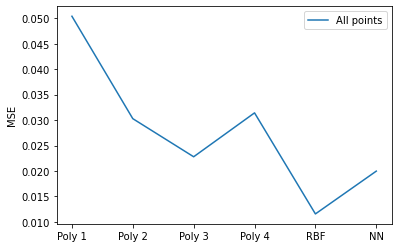

In [70]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

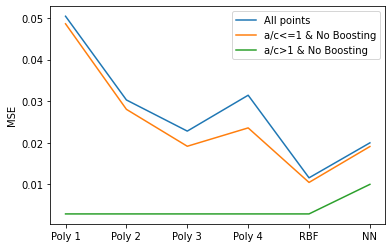

In [71]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

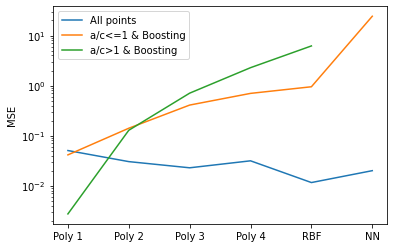

In [72]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

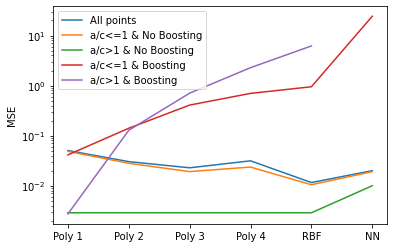

In [74]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE, label="All points")
plt.plot(algos, MSE_le_nb, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

#### Baseline

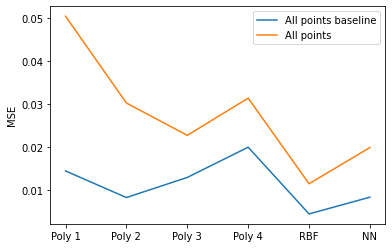

In [75]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points baseline")
plt.plot(algos, MSE, label="All points")
plt.ylabel("MSE")
plt.legend()

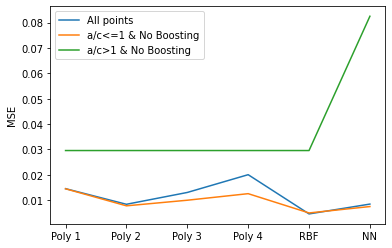

In [76]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_nb_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb_base, label="a/c>1 & No Boosting")
plt.ylabel("MSE")
plt.legend()

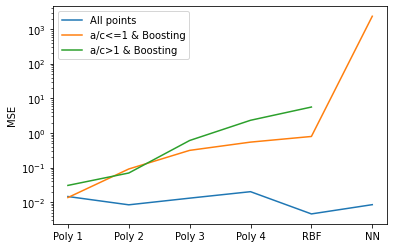

In [77]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()

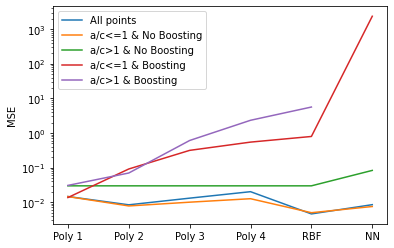

In [78]:
algos = ["Poly 1", "Poly 2", "Poly 3", "Poly 4", "RBF", "NN"]
plt.plot(algos, MSE_base, label="All points")
plt.plot(algos, MSE_le_nb_base, label="a/c<=1 & No Boosting")
plt.plot(algos, MSE_g_nb_base, label="a/c>1 & No Boosting")
plt.plot(algos, MSE_le_b_base, label="a/c<=1 & Boosting")
plt.plot(algos, MSE_g_b_base, label="a/c>1 & Boosting")
plt.ylabel("MSE")
plt.semilogy()
plt.legend()